BIBLIOTECAS

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

DETECCION DE ROSTROS

In [36]:
def basim(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    jeta=image
    for (x, y, w, h) in faces:
        jeta = image[y:y+h, x:x+w]
    return jeta

CORRECCION GAMA

In [37]:
def nehal(img):
    gamma = 1.5
    img_normalized = img / 255.0
    img_corrected = np.power(img_normalized, gamma)
    img_corrected = (img_corrected * 255).astype(np.uint8)
    return img_corrected

CARA CHIDA

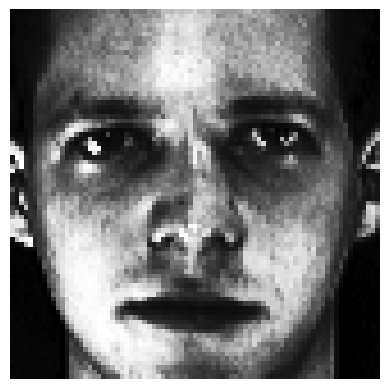

In [38]:
def mirage(imagen):
    jeta=basim(imagen)
    if len(jeta.shape) != 2:
        jeta = cv2.cvtColor(jeta, cv2.COLOR_BGR2GRAY)
    equalizada = cv2.equalizeHist(jeta)
    final=nehal(equalizada)
    return final

final = cv2.imread('1.pgm')
final=mirage(final)

plt.imshow(final, cmap='gray')
plt.axis('off')  # Desactiva los ejes
plt.show()

DETECCION DE OJOS

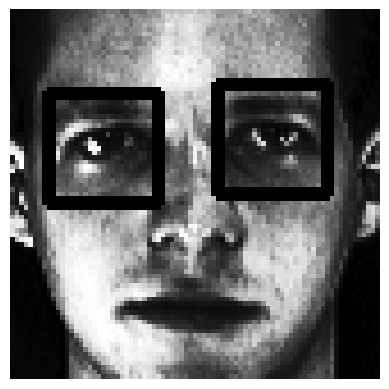

In [39]:
def roshan(final):
    cascada_ojos = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    ojos = cascada_ojos.detectMultiScale(final)
    for (ox, oy, ow, oh) in ojos:
        cv2.rectangle(final, (ox, oy), (ox+ow, oy+oh), (0, 255, 0), 2)
    return final


final=roshan(final)
plt.imshow(final, cmap='gray')
plt.axis('off')  # Desactiva los ejes
plt.show()

DISTANCIAS EUCLIDIANAS

In [40]:
import numpy as np

def rellenar_con_ceros(vector, longitud_deseada):
    # Crear un nuevo vector de ceros con la longitud deseada
    vector_rellenado = np.zeros(longitud_deseada)
    # Copiar los elementos del vector original al nuevo vector
    vector_rellenado[:len(vector)] = vector
    return vector_rellenado

def distancia_euclidiana(vector1, vector2):
    # Encontrar la longitud del vector más largo
    max_longitud = max(len(vector1), len(vector2))
    
    # Rellenar ambos vectores con ceros para que tengan la misma longitud
    vector1_rellenado = rellenar_con_ceros(vector1, max_longitud)
    vector2_rellenado = rellenar_con_ceros(vector2, max_longitud)
    
    # Calcular la distancia euclidiana
    distancia = np.linalg.norm(vector1_rellenado - vector2_rellenado)
    
    return distancia

SIFT ENTRE 2 IMAGENES

In [41]:
def rafiq(imagen1, imagen2):
    # Inicializar el detector SIFT
    sift = cv2.SIFT_create()

    # Encontrar los puntos clave y los descriptores usando SIFT
    puntos_clave1, descriptores1 = sift.detectAndCompute(imagen1, None)
    puntos_clave2, descriptores2 = sift.detectAndCompute(imagen2, None)

    # Crear el objeto BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Encontrar las mejores coincidencias
    coincidencias = bf.match(descriptores1, descriptores2)

    # Ordenar las coincidencias en base a la distancia
    coincidencias = sorted(coincidencias, key=lambda x: x.distance)

    #Cantidad de puntos clave
    puntos=100

    # Dibujar las primeras 10 coincidencias
    imagen_con_coincidencias = cv2.drawMatches(
        imagen1, puntos_clave1, imagen2, puntos_clave2, coincidencias[:puntos], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Mostrar la imagen con las coincidencias
    """plt.imshow(imagen_con_coincidencias)
    plt.axis('off')  # Desactiva los ejes
    plt.show()"""

    # Obtener los descriptores de los puntos clave emparejados
    descriptores_emparejados1 = []
    descriptores_emparejados2 = []

    for coincidencia in coincidencias:
        descriptores_emparejados1.append(descriptores1[coincidencia.queryIdx])
        descriptores_emparejados2.append(descriptores2[coincidencia.trainIdx])

    # Convertir las listas a arreglos de numpy
    descriptores_emparejados1 = np.array(descriptores_emparejados1)
    descriptores_emparejados2 = np.array(descriptores_emparejados2)

    return descriptores_emparejados1, descriptores_emparejados2, puntos_clave1, puntos_clave2

SIFT CON UNA IMAGEN

In [42]:
def bureau(imagen1):
    # Inicializar el detector SIFT
    sift = cv2.SIFT_create()

    # Encontrar los puntos clave y los descriptores usando SIFT
    puntos_clave,descriptores = sift.detectAndCompute(imagen1, None)

    return puntos_clave

CERCANIZACION

In [43]:
def cercanizacion(des1, des2):
    
    #Distancias euclidianas
    distancias=[]
    for i in range(des1.shape[0]):
        dis=distancia_euclidiana(des1[i],des2[i])
        distancias.append(dis)
    
    #Ver si son cercanas
    s=0
    for i in distancias:
        if i<400:
            s=s+1
    return s

BASE DE DATOS

In [44]:
#Nombre de la carpeta
carpeta = 'Rostros'

#Arreglo de caras guardadas
TP=[]
#Umbral
umbral=10
#Decimal
T=[]

#Ciclo chido
for archivo in os.listdir(carpeta):
    ruta = os.path.join(carpeta, archivo)
    if os.path.isfile(ruta):
        
        #Lectura de imagen
        carita=cv2.imread(ruta)
        #Imagen mejorada
        carota=mirage(carita)
        #SIFT en la cara
        puntos_de_cara=len(bureau(carota))
        TP.append(puntos_de_cara)
        T.append(puntos_de_cara*(umbral/100))

#Impresiones
print(TP)
print(T)

[72, 141]
[7.2, 14.100000000000001]


NUEVA IMAGEN

In [45]:
#Imagen base
img1=cv2.imread('2.pgm')
s=[]
#Enchidacion xd
imagen1=mirage(img1)

#Ciclo de comparacion
for archivo in os.listdir(carpeta):
    ruta = os.path.join(carpeta, archivo)
    if os.path.isfile(ruta):
        #print(ruta)
        #Lectura de imagen
        carita=cv2.imread(ruta)
        #Imagen mejorada
        carota=mirage(carita)
        #SIFT
        des1, des2, pc1, pc2=rafiq(imagen1, carota)
        s.append(cercanizacion(des1,des2))
print(s)

valor_maximo = max(s)
# Encontrar el índice del valor máximo
indice_maximo = s.index(valor_maximo)

# Mostrar el resultado
print("Este rostro es de la persona ", indice_maximo+1)
        

[40, 39]
Este rostro es de la persona  1
